In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
x,y=sp.symbols('x,y')

In [3]:
X=np.linspace(-5,5,500) # 500 pints from -5 to 5

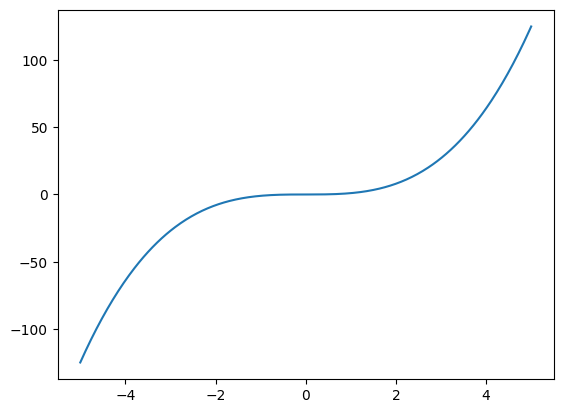

In [4]:
plt.plot(X,X**3); # basic plot
plt.savefig('Basic_plot.png')

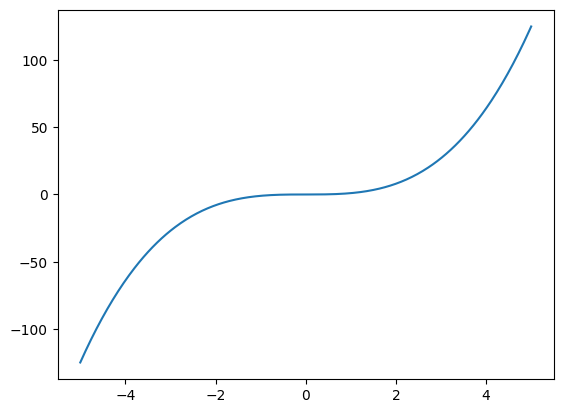

In [5]:
fig, ax = plt.subplots() # creating a plot object
ax.plot(X,X**3);

In [5]:
fig.savefig('OO_plot.png')

In [6]:
ax.plot(X,-21*(X-1)**2+30,color='red',linewidth=3,linestyle='--') # add a second curve

In [7]:
ax.set_ylim(-200,200) #set limits on y values
ax.spines[['top', 'right']].set_visible(False) # eliminate top and right bars
ax.spines[['left', 'bottom']].set_position('zero') # set axes to cross at (0,0)
ax.set_xlabel('$x$ - axis',loc='right')
ax.set_ylabel('$y$ - axis',loc='top')

Text(4.444444444444452, 1, '$y$ - axis')

In [8]:
fig.savefig('OO_plotPlus.png')

In [9]:
from scipy.optimize import curve_fit

In [10]:
def arb_cubic(x,a,b,c,d): return a*x**3+b*x**2+c*x+d

In [11]:
xdata=np.array([0,1,3,5,7])
ydata=np.array([0,1,3,120,350])
coef,covar=curve_fit(arb_cubic, xdata, ydata)
coef

array([  0.91461749,   2.66771753, -13.83706389,   3.53089533])

In [12]:
covar

array([[   0.42646398,   -4.53722488,   11.65521585,   -3.37653923],
       [  -4.53722488,   49.52798806, -132.69961542,   42.66127394],
       [  11.65521585, -132.69961542,  383.49320867, -154.02213263],
       [  -3.37653923,   42.66127394, -154.02213263,  142.0094477 ]])

In [13]:
F = np.vectorize(lambda x: arb_cubic(x,coef[0],coef[1],coef[2],coef[3]))

In [14]:
F([1,2])

array([-6.72383354, -6.15542245])

(-20.0, 400.0)

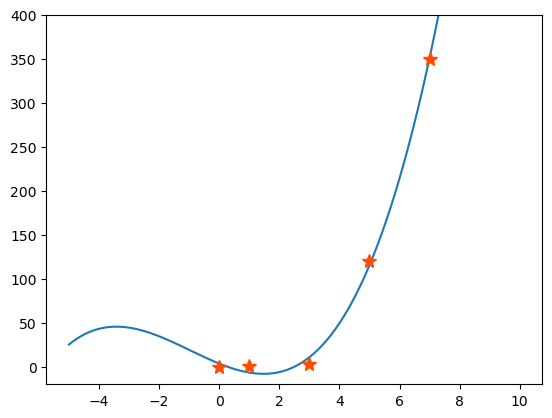

In [15]:
X=np.linspace(-5,10,500) # 500 pints from -5 to 5
fit_fig,fit_ax = plt.subplots()
fit_ax.plot(X,F(X))
fit_ax.plot(xdata,ydata,"*",markersize=10,color="#ff4d00")
fit_ax.set_ylim(-20,400)

In [16]:
fit_fig.savefig("fit_cubic.png")

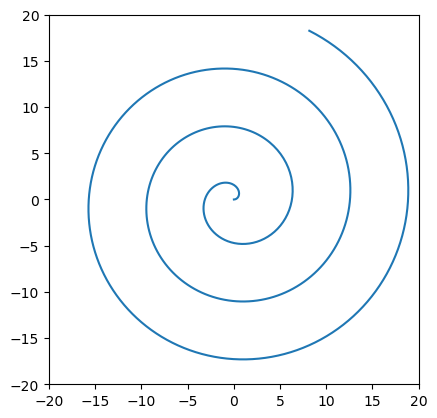

In [17]:
X = np.linspace(0,20,500)
para_fig,para_ax=plt.subplots()
para_ax.plot(X*np.cos(X),X*np.sin(X))
para_ax.set_xlim(-20,20)
para_ax.set_ylim(-20,20)
para_ax.set_aspect('equal')

(-4.0, 4.0)

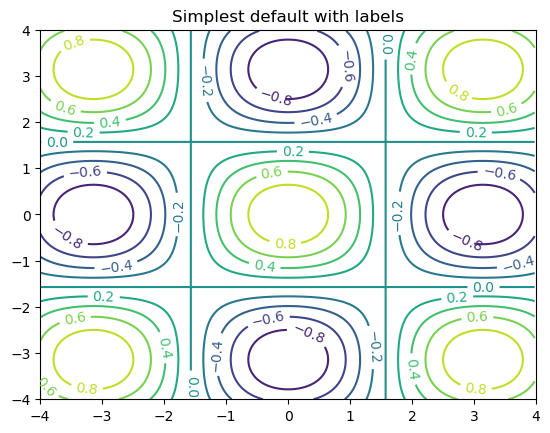

In [18]:
delta = 0.025
xrange = np.arange(-4.0, 4.0, delta)
yrange = np.arange(-4.0, 4.0, delta)#delta)
X, Y = np.meshgrid(xrange, yrange)
Z = np.cos(X)*np.cos(Y)#(Z1 - Z2) * 2

fig_cp, ax_cp = plt.subplots()
CS = ax_cp.contour(X, Y, Z,[-1+i*0.2 for i in range(11)])
ax_cp.clabel(CS, inline=True, fontsize=10)
ax_cp.set_title('Simplest default with labels')
ax_cp.set_xlim(-4,4)
ax_cp.set_ylim(-4,4)
# plt.show()